In [ ]:
!pip install tensorflow opencv-python-headless pytesseract

# Step 2: Import Libraries
import cv2
import pytesseract
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
!pip install tensorflow opencv-python-headless pytesseract

# Step 2: Import Libraries
import cv2
import pytesseract
import tensorflow as tf
import numpy as np
from google.colab.patches import cv2_imshow

# Configure Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Step 3: Load Images (Replace with your image paths)
image_path_1 = "/content/WhatsApp Image 2024-06-09 at 16.08.55.jpeg"  # Replace with actual image path
image_path_2 = "/content/WhatsApp Image 2024-09-28 at 13.42.52.jpeg"     # Replace with actual image path

# Read the images
image1 = cv2.imread(image_path_1)
image2 = cv2.imread(image_path_2)

# Step 4: Pre-process Image (Remove Noise)
def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Use GaussianBlur to remove noise
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    # Edge detection
    edges = cv2.Canny(blurred, 30, 150)
    return edges

edges1 = preprocess_image(image1)
edges2 = preprocess_image(image2)

# Display pre-processed images
cv2_imshow(edges1)
cv2_imshow(edges2)

# Step 5: Use Tesseract OCR to Extract Text
def extract_text(image):
    text = pytesseract.image_to_string(image)
    return text

text1 = extract_text(image1)
text2 = extract_text(image2)

print("Extracted Text from Image 1:")
print(text1)

print("\nExtracted Text from Image 2:")
print(text2)

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.8/874.8 kB 15.2 MB/s eta 0:00:00


In [ ]:
pip install supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.5/151.5 kB 3.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from huggingface_hub import hf_hub_download
from supervision import Detections

# repo details
repo_config = dict(
    repo_id = "arnabdhar/YOLOv8-nano-aadhar-card",
    filename = "model.pt",
    local_dir = "./models"
)

# load model
model = YOLO(hf_hub_download(**repo_config))

# get id to label mapping
id2label = model.names
print(id2label)

# Perform Inference
image_url = "https://i.pinimg.com/originals/08/6d/82/086d820550f34066764f4047ddc263ca.jpg"

detections = Detections.from_ultralytics(model.predict(image_url)[0])

print(detections)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


model.pt:   0%|          | 0.00/6.26M [00:00<?, ?B/s]

{0: 'AADHAR_NUMBER', 1: 'DATE_OF_BIRTH', 2: 'GENDER', 3: 'NAME', 4: 'ADDRESS'}



100%|██████████| 96.8k/96.8k [00:00<00:00, 8.51MB/s]


image 1/1 /content/086d820550f34066764f4047ddc263ca.jpg: 448x640 1 AADHAR_NUMBER, 1 DATE_OF_BIRTH, 1 GENDER, 1 NAME, 747.3ms
Speed: 20.8ms preprocess, 747.3ms inference, 40.3ms postprocess per image at shape (1, 3, 448, 640)
Detections(xyxy=array([[     326.81,      519.13,      687.36,      567.39],
       [     306.72,      212.71,      462.34,      248.61],
       [     457.42,      290.28,      551.77,      316.72],
       [     546.18,      255.83,      661.11,      282.19]], dtype=float32), mask=None, confidence=array([    0.80551,     0.78437,     0.75225,     0.68004], dtype=float32), class_id=array([0, 3, 2, 1]), tracker_id=None, data={'class_name': array(['AADHAR_NUMBER', 'NAME', 'GENDER', 'DATE_OF_BIRTH'], dtype='<U13')})


In [ ]:
from ultralytics import YOLO
from huggingface_hub import hf_hub_download
from supervision import Detections

# YOLO model repository details
repo_config = {
    "repo_id": "arnabdhar/YOLOv8-nano-aadhar-card",
    "filename": "model.pt",
    "local_dir": "./models"
}

# Load the YOLO model
model = YOLO(hf_hub_download(**repo_config))

# Define the class labels
id2label = model.names
print(f"Class Labels: {id2label}")

# Inference on the Aadhaar card image
image_path = "path/to/your/aadhaar_image.jpg"  # Replace with the path to your image file
results = model.predict(image_path)[0]

# Extract detections
detections = Detections.from_ultralytics(results)

# Initialize an empty dictionary to store key-value pairs
extracted_data = {}

# Map detected text to their corresponding labels
for box, class_id in zip(detections.xyxy, detections.class_id):
    # Get the class name using the class_id
    class_name = id2label[class_id]
    # Use OCR or manual input to get the actual text within the detected box
    detected_text = "Detected_Text"  # Replace with your OCR extraction logic
    extracted_data[class_name] = detected_text

# Print extracted data in key-value format
print(extracted_data)


Class Labels: {0: 'AADHAR_NUMBER', 1: 'DATE_OF_BIRTH', 2: 'GENDER', 3: 'NAME', 4: 'ADDRESS'}



FileNotFoundError: path/to/your/aadhaar_image.jpg does not exist

In [ ]:
pip install easyocr ultralytics supervision huggingface_hub matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 20.5 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
from ultralytics import YOLO
from huggingface_hub import hf_hub_download
from supervision import Detections
import easyocr
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the YOLOv8 Model
repo_config = dict(
    repo_id="arnabdhar/YOLOv8-nano-aadhar-card",  # Repository details
    filename="model.pt",
    local_dir="./models"
)

# Load the model from Hugging Face Hub
model = YOLO(hf_hub_download(**repo_config))

# Step 2: Load the Image for Detection
image_path = "/content/Screenshot 2024-09-28 152158.png"  # Replace with your Aadhaar card image path

# Load the image using OpenCV
image = cv2.imread(image_path)

# Perform detection using YOLOv8
results = model.predict(image_path)[0]

# Extract detected objects
detections = Detections.from_ultralytics(results)

# Map class IDs to labels
id2label = model.names
print("Detected Labels:", id2label)

# Step 3: Display Detected Areas (Optional)
for det in results:
    x1, y1, x2, y2 = map(int, det.xyxy[0])  # Extract bounding box coordinates
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Text Areas")
plt.axis("off")
plt.show()

# Step 4: Use EasyOCR to Extract Text
reader = easyocr.Reader(['en'])  # Initialize EasyOCR reader for English

# Prepare a dictionary to store extracted text as key-value pairs
extracted_data = {}

# Iterate through each detection and extract text
for i, box in enumerate(detections.xyxy):
    x1, y1, x2, y2 = map(int, box)
    cropped_img = image[y1:y2, x1:x2]  # Crop the detected text area

    # Perform OCR on the cropped image
    result = reader.readtext(cropped_img)

    # Extract text from the OCR result and map it to the corresponding label
    label = id2label[detections.class_id[i]]
    text = " ".join([res[1] for res in result])  # Combine detected text
    extracted_data[label] = text  # Store the extracted text as key-value pairs

# Step 5: Print Extracted Data
print("Extracted Data as Key-Value Pairs:")
for key, value in extracted_data.items():
    print(f"{key}: {value}")



image 1/1 /content/Screenshot 2024-09-28 152158.png: 608x640 1 AADHAR_NUMBER, 1 DATE_OF_BIRTH, 1 GENDER, 1 NAME, 178.4ms
Speed: 3.4ms preprocess, 178.4ms inference, 1.1ms postprocess per image at shape (1, 3, 608, 640)
Detected Labels: {0: 'AADHAR_NUMBER', 1: 'DATE_OF_BIRTH', 2: 'GENDER', 3: 'NAME', 4: 'ADDRESS'}


AttributeError: 'Results' object has no attribute 'xyxy'. See valid attributes below.

    A class for storing and manipulating inference results.

    This class encapsulates the functionality for handling detection, segmentation, pose estimation,
    and classification results from YOLO models.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (Tuple[int, int]): Original image shape in (height, width) format.
        boxes (Boxes | None): Object containing detection bounding boxes.
        masks (Masks | None): Object containing detection masks.
        probs (Probs | None): Object containing class probabilities for classification tasks.
        keypoints (Keypoints | None): Object containing detected keypoints for each object.
        obb (OBB | None): Object containing oriented bounding boxes.
        speed (Dict[str, float | None]): Dictionary of preprocess, inference, and postprocess speeds.
        names (Dict[int, str]): Dictionary mapping class IDs to class names.
        path (str): Path to the image file.
        _keys (Tuple[str, ...]): Tuple of attribute names for internal use.

    Methods:
        update: Updates object attributes with new detection results.
        cpu: Returns a copy of the Results object with all tensors on CPU memory.
        numpy: Returns a copy of the Results object with all tensors as numpy arrays.
        cuda: Returns a copy of the Results object with all tensors on GPU memory.
        to: Returns a copy of the Results object with tensors on a specified device and dtype.
        new: Returns a new Results object with the same image, path, and names.
        plot: Plots detection results on an input image, returning an annotated image.
        show: Shows annotated results on screen.
        save: Saves annotated results to file.
        verbose: Returns a log string for each task, detailing detections and classifications.
        save_txt: Saves detection results to a text file.
        save_crop: Saves cropped detection images.
        tojson: Converts detection results to JSON format.

    Examples:
        >>> results = model("path/to/image.jpg")
        >>> for result in results:
        ...     print(result.boxes)  # Print detection boxes
        ...     result.show()  # Display the annotated image
        ...     result.save(filename="result.jpg")  # Save annotated image
    

In [2]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 37.7 MB/s eta 0:00:00


In [4]:
pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 46.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 kB 22.6 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.pt:   0%|          | 0.00/6.26M [00:00<?, ?B/s]


image 1/1 /content/WhatsApp Image 2024-06-09 at 16.08.55.jpeg: 448x640 1 AADHAR_NUMBER, 1 DATE_OF_BIRTH, 1 GENDER, 1 NAME, 1078.4ms
Speed: 33.7ms preprocess, 1078.4ms inference, 38.4ms postprocess per image at shape (1, 3, 448, 640)
Detected Labels: {0: 'AADHAR_NUMBER', 1: 'DATE_OF_BIRTH', 2: 'GENDER', 3: 'NAME', 4: 'ADDRESS'}


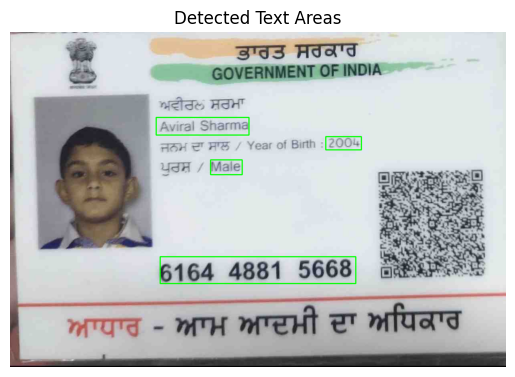

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteExtracted Data as Key-Value Pairs:
GENDER: Maie
AADHAR_NUMBER: 616414881 5668
NAME: Fvelcunna
DATE_OF_BIRTH: 122004


In [5]:
# Import necessary libraries
from ultralytics import YOLO
from huggingface_hub import hf_hub_download
import easyocr
import cv2
import matplotlib.pyplot as plt

# Step 1: Load the YOLOv8 Model
repo_config = dict(
    repo_id="arnabdhar/YOLOv8-nano-aadhar-card",  # Repository details
    filename="model.pt",
    local_dir="./models"
)

# Load the model from Hugging Face Hub
model = YOLO(hf_hub_download(**repo_config))

# Step 2: Load the Image for Detection
image_path = "/content/WhatsApp Image 2024-06-09 at 16.08.55.jpeg"  # Replace with your Aadhaar card image path

# Load the image using OpenCV
image = cv2.imread(image_path)

# Perform detection using YOLOv8
results = model.predict(image_path)[0]

# Extract detected boxes and class IDs
boxes = results.boxes.xyxy  # Bounding boxes (x1, y1, x2, y2)
class_ids = results.boxes.cls  # Class IDs

# Map class IDs to labels
id2label = model.names
print("Detected Labels:", id2label)

# Step 3: Display Detected Areas (Optional)
for box in boxes:  # Iterate through the bounding boxes
    x1, y1, x2, y2 = map(int, box)  # Extract bounding box coordinates
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Draw bounding box

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected Text Areas")
plt.axis("off")
plt.show()


import numpy as np

# Function to apply image preprocessing for better OCR results
def enhance_brightness_sharpness(cropped_img):
    # Convert the image to the LAB color space for brightness enhancement
    lab = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2LAB)

    # Split the LAB image to L, A, and B channels
    l, a, b = cv2.split(lab)

    # Increase the L channel (brightness)
    l = cv2.equalizeHist(l)  # Histogram equalization to improve brightness
    lab = cv2.merge((l, a, b))

    # Convert back to BGR format
    bright_img = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    # Apply a sharpening kernel to the image to enhance sharpness
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    sharp_img = cv2.filter2D(bright_img, -1, kernel)

    return sharp_img

# Step 4: Use EasyOCR to Extract Text
reader = easyocr.Reader(['en'])  # Initialize EasyOCR reader for English

# Prepare a dictionary to store extracted text as key-value pairs
extracted_data = {}

# Iterate through each detection and extract text
for i, box in enumerate(boxes):
    x1, y1, x2, y2 = map(int, box)
    cropped_img = image[y1:y2, x1:x2]  # Crop the detected text area

    # Enhance brightness and sharpness of the cropped image
    enhanced_img = enhance_brightness_sharpness(cropped_img)

    # Perform OCR on the enhanced image
    result = reader.readtext(enhanced_img)

    # Extract text from the OCR result and map it to the corresponding label
    label = id2label[int(class_ids[i])]  # Get label using class ID
    text = " ".join([res[1] for res in result])  # Combine detected text
    extracted_data[label] = text  # Store the extracted text as key-value pairs

# Step 5: Print Extracted Data
print("Extracted Data as Key-Value Pairs:")
for key, value in extracted_data.items():
    print(f"{key}: {value}")